In [ ]:
from google.colab import drive; drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")
os.getcwd()

'/content/drive/My Drive/Colab Notebooks'

## **DenseNet on CIFAR10**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

[8]


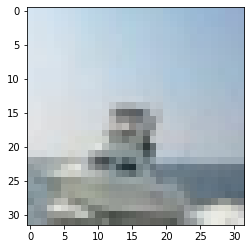

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print(train_labels[100])
plt.imshow(train_images[100], cmap="Greys_r")

train_labels = train_labels.reshape((-1))
test_labels = test_labels.reshape((-1))

data = tf.data.Dataset.from_tensor_slices(
    (train_images.astype(np.float32) / 255, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=50000).batch(128).repeat()

test_data = tf.data.Dataset.from_tensor_slices(
    (test_images.astype(np.float32) / 255, test_labels.astype(np.int32))).batch(128)

In [ ]:
def dnsNet(inp1, filter_size):
  conv1_1 = tf.keras.layers.Conv2D(filter_size, 3, activation=tf.nn.relu, padding="same")(inp1)
  conv1_2 = tf.keras.layers.Conv2D(filter_size, 3, activation=tf.nn.relu, padding="same")(conv1_1)
  conc1 = tf.keras.layers.concatenate([conv1_1, conv1_2])
  conv1_3 = tf.keras.layers.Conv2D(filter_size, 3, activation=tf.nn.relu, padding="same")(conc1)
  conc2 = tf.keras.layers.concatenate([conv1_1, conv1_3])
  conv1_4 = tf.keras.layers.Conv2D(filter_size, 3, activation=tf.nn.relu, padding="same")(conc2)
  conc3 = tf.keras.layers.concatenate([conv1_1, conv1_4])
  conv1_5 = tf.keras.layers.Conv2D(filter_size, 3, activation=tf.nn.relu, padding="same")(conc3)
  return tf.keras.layers.concatenate([conv1_1, conv1_5])

In [ ]:
inp = tf.keras.layers.Input((32, 32, 3))

BatchNorm = tf.keras.layers.BatchNormalization()(inp)
relu = tf.keras.layers.Activation('relu')(BatchNorm)
conv1 = tf.keras.layers.Conv2D(100, 3, activation = tf.nn.relu, name= "1stConv")(relu)
inp1 = tf.keras.layers.MaxPool2D((2, 2))(conv1)

filter_size = 16
dense1 = dnsNet(inp1, filter_size)

BatchNorm2 = tf.keras.layers.BatchNormalization()(dense1)
relu = tf.keras.layers.Activation('relu')(BatchNorm2)
conv2 = tf.keras.layers.Conv2D(50, 3, activation = tf.nn.relu)(BatchNorm2)
inp2 = tf.keras.layers.MaxPool2D((2, 2))(conv2)

filter_size = 32
dense2 = dnsNet(inp2, filter_size)

BatchNorm3 = tf.keras.layers.BatchNormalization()(dense2)
relu = tf.keras.layers.Activation('relu')(BatchNorm3)
conv3 = tf.keras.layers.Conv2D(30, 3, activation = tf.nn.relu)(BatchNorm3)
inp3 = tf.keras.layers.MaxPool2D((2, 2))(conv3)

filter_size = 64
dense3 = dnsNet(inp3, filter_size)

# BatchNorm4 = tf.keras.layers.BatchNormalization()(dense3)
# conv4 = tf.keras.layers.Conv2D(12, 3, activation = tf.nn.relu)(BatchNorm4)
# inp4 = tf.keras.layers.MaxPool2D((2, 2))(conv4)

# filter_size = 64
# dense4 = dnsNet(inp4, filter_size)

inp5 = tf.keras.layers.MaxPool2D((2,2))(dense3)
flat = tf.keras.layers.Flatten()(inp5)
out = tf.keras.layers.Dense(10)(flat)


model = tf.keras.Model(inputs=inp, outputs=out, name='cifar10_model')
model.summary()
# tf.keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=False)

Model: "cifar10_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
batch_normalization_9 (BatchNor (None, 32, 32, 3)    12          input_4[0][0]                    
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 32, 32, 3)    0           batch_normalization_9[0][0]      
__________________________________________________________________________________________________
1stConv (Conv2D)                (None, 30, 30, 100)  2800        activation_9[0][0]               
______________________________________________________________________________________

In [ ]:
opt = tf.optimizers.Adam()

loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

train_acc_metric = tf.metrics.SparseCategoricalAccuracy()

model.compile(optimizer= opt, loss= loss_fn, metrics= [train_acc_metric])

model.fit(data, steps_per_epoch=2000, epochs=3)

Epoch 1/3
2000/2000 [==============================] - 26s 13ms/step - loss: 1.0343 - sparse_categorical_accuracy: 0.6293
Epoch 2/3
2000/2000 [==============================] - 25s 13ms/step - loss: 0.5574 - sparse_categorical_accuracy: 0.8045
Epoch 3/3
2000/2000 [==============================] - 25s 13ms/step - loss: 0.3640 - sparse_categorical_accuracy: 0.8706


In [ ]:
model.evaluate(test_data)

79/79 [==============================] - 0s 5ms/step - loss: 0.8746 - sparse_categorical_accuracy: 0.7633


[0.8746414184570312, 0.7633000016212463]

**Observation** : Training accuracy = 87.06%     Test accuracy = 76.33%

## *tf.function*

In [ ]:
import tensorflow as tf
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import time


mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0], cmap='Greys_r')

train_images = train_images.reshape([-1, 28, 28, 1])
train_images = train_images.astype(np.float32) / 255
test_images = test_images.reshape([-1, 28, 28, 1])
test_images = test_images.astype(np.float32) / 255

data = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels.astype(np.int32)))
data = data.shuffle(buffer_size=60000).batch(128).repeat()

# note: we batch the test data, but do not shuffle/repeat
test_data = tf.data.Dataset.from_tensor_slices(
    (test_images, test_labels.astype(np.int32))).batch(128)



from tensorflow.keras import datasets, layers, models
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(28, 3, activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(56, 3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        8096      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 56)        16184     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)              

In [ ]:
train_steps = 2500
# opt = tf.optimizers.SGD(0.01)
opt = tf.optimizers.Adam(0.01)

# from_logits = True!! #neverforget
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()

In [ ]:
@tf.function
def grd(imgs, lbls):
  with tf.GradientTape() as t:
      logits = model(imgs)
      # loss format is generally: first argument targets, second argument outputs
      xent = loss_fn(lbls, logits)
      varis = model.trainable_variables
      grads = t.gradient(xent, varis)
      opt.apply_gradients(zip(grads, varis))
      # train_acc_metric(lbls, logits)
  return (logits, xent)

In [ ]:
start = time.time()
for step, (img_batch, lbl_batch) in enumerate(data):
    # start = time.time()
    if step > train_steps:
        break
    logits, xent = grd(img_batch, lbl_batch)

    
    if (step % 100 == 0):

      train_acc_metric(lbl_batch, logits)
      acc = train_acc_metric.result()
      print("Loss: {} Accuracy: {}".format(xent, acc))
      train_acc_metric.reset_states()
stop = time.time()
print("Took {} seconds for execution.".format(stop - start))

Loss: 2.2981443405151367 Accuracy: 0.171875
Loss: 0.016952555626630783 Accuracy: 1.0
Loss: 0.031292058527469635 Accuracy: 0.9921875
Loss: 0.10141630470752716 Accuracy: 0.9609375
Loss: 0.07408521324396133 Accuracy: 0.9765625
Loss: 0.008410639129579067 Accuracy: 1.0
Loss: 0.017894333228468895 Accuracy: 1.0
Loss: 0.15510937571525574 Accuracy: 0.9453125
Loss: 0.10325734317302704 Accuracy: 0.9609375
Loss: 0.01843266747891903 Accuracy: 1.0
Loss: 0.07056888937950134 Accuracy: 0.9765625
Loss: 0.03711150586605072 Accuracy: 0.9921875
Loss: 0.023171206936240196 Accuracy: 0.9921875
Loss: 0.02340022288262844 Accuracy: 0.9921875
Loss: 0.03551407903432846 Accuracy: 0.9765625
Loss: 0.000888646231032908 Accuracy: 1.0
Loss: 0.024030419066548347 Accuracy: 0.9921875
Loss: 0.027563482522964478 Accuracy: 0.9921875
Loss: 0.04432711377739906 Accuracy: 0.9921875
Loss: 0.03643118962645531 Accuracy: 0.9921875
Loss: 0.03726992756128311 Accuracy: 0.984375
Loss: 0.04279814660549164 Accuracy: 0.9921875
Loss: 0.00310

In [ ]:
test_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
for img_batch, lbl_batch in test_data:
    test_acc_metric(lbl_batch, model(img_batch))
print("Test acc: {}".format(test_acc_metric.result()))
test_acc_metric.reset_states()

Test acc: 0.9793999791145325


**Observation** : Execution time on tf.function drastically reduces to around 7 secs .